CIFAR-10 dataset is world famous data set to train many ml and computer vision algorithms. To practice more on datasets which contains image I chose this project.

In [6]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers, datasets
from keras.layers import Dense

In [8]:
# get the data
(train_data, train_label), (test_data, test_label) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [14]:
# scale the pixels 
train_data, test_data = train_data / 255, test_data / 255

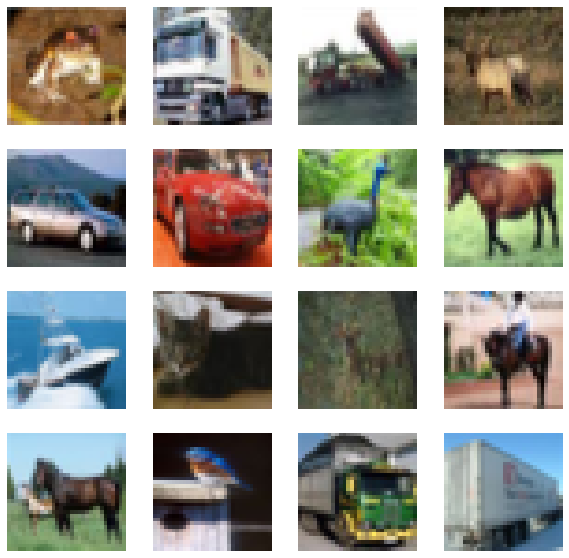

In [18]:
# visualize the data
plt.figure(figsize=(10, 10))
for i in range(16):
  plt.subplot(4, 4, i + 1)
  plt.axis('off')
  plt.grid(False)
  plt.imshow(train_data[i])

plt.show()  

In [19]:
train_data.shape

(50000, 32, 32, 3)

In [50]:
# create the cnn model

model = keras.Sequential(
    [
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Flatten(), # from 3D to 1D
    layers.Dropout(0.5), # prevent from the overfitting
    layers.Dense(64, activation='relu'),
    layers.Dense(10)   
    ]
)

In [51]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 13, 13, 128)       36992     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 4, 4, 128)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_3 (Dropout)         (None, 2048)             

In [52]:
# compile the model
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [53]:
# create a callback object

from keras.callbacks import EarlyStopping
stop_early = EarlyStopping(monitor='val_loss', patience=3, mode='min')

In [55]:
# fit the model
history = model.fit(train_data, train_label, validation_data=(test_data, test_label), epochs=10, callbacks=stop_early)

Epoch 1/10
1563/1563 [==============================] - 101s 65ms/step - loss: 1.0253 - accuracy: 0.6431 - val_loss: 0.9299 - val_accuracy: 0.6774
Epoch 2/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.9702 - accuracy: 0.6624 - val_loss: 0.8898 - val_accuracy: 0.6993
Epoch 3/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.9294 - accuracy: 0.6762 - val_loss: 0.8635 - val_accuracy: 0.7067
Epoch 4/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.8919 - accuracy: 0.6905 - val_loss: 0.8351 - val_accuracy: 0.7155
Epoch 5/10
1563/1563 [==============================] - 101s 65ms/step - loss: 0.8618 - accuracy: 0.6996 - val_loss: 0.8316 - val_accuracy: 0.7131
Epoch 6/10
1563/1563 [==============================] - 101s 65ms/step - loss: 0.8367 - accuracy: 0.7079 - val_loss: 0.7857 - val_accuracy: 0.7296
Epoch 7/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.8149 - accuracy: 0.7165 - val_loss: 0

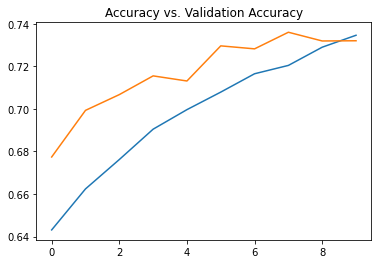

In [57]:
# evaluate the model - accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc, label='accuracy')
plt.plot(val_acc, label='validation accuracy')
plt.title('Accuracy vs. Validation Accuracy')
plt.show()

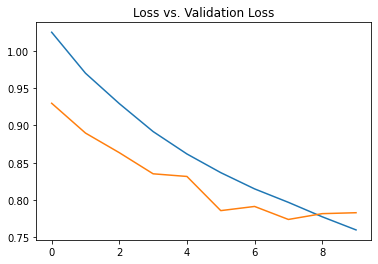

In [58]:
# evaluate the model - loss
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label='loss')
plt.plot(val_loss, label='validation loss')
plt.title('Loss vs. Validation Loss')
plt.show()

Model reached out 0.734 accuracy on training and 0.732 on validation also plots show that model is quite coherent(there is no overfitting) but we can still increase the accuracy rate by changing model parameters.